In [1]:
import pandas as pd

from data_preparation.additional_data_preparation import prepare_covid_dataset, get_mobility_data
from paths import *

from data_preparation import get_metadata, get_series, clip_missing_prone_values, prepare_region_and_country_series

series_with_heavy_missing, metadata_with_heavy_missing = get_series(), get_metadata()
division_missing_counts, metadata, series = clip_missing_prone_values(metadata_with_heavy_missing,
                                                                      series_with_heavy_missing)
region_series, metadata_region, country_series, metadata_country = prepare_region_and_country_series(series,
                                                                                                     metadata)

In [4]:
time_series_bd = country_series.Bangladesh
time_series_bd

time
2017-01-01 00:00:00    205.85
2017-01-01 01:00:00    200.40
2017-01-01 02:00:00    179.61
2017-01-01 03:00:00    170.06
2017-01-01 04:00:00    162.95
                        ...  
2022-04-30 19:00:00     50.60
2022-04-30 20:00:00     52.62
2022-04-30 21:00:00     35.74
2022-04-30 22:00:00     33.84
2022-04-30 23:00:00     36.02
Name: Bangladesh, Length: 46704, dtype: float64

In [10]:
time_series_bd['2018-03':'2018-08'].mean(),time_series_bd['2019-03':'2019-08'].mean(),time_series_bd['2020-03':'2020-08'].mean(),time_series_bd['2021-03':'2021-08'].mean()

(42.74621476166069, 37.30622247446083, 31.05304781327895, 40.03075868372944)

In [127]:
# regular = pd.concat((time_series_bd['2018-03':'2018-08'],time_series_bd['2019-03':'2019-08']))
regular = time_series_bd['2019-03':'2019-08']
# non_regular = pd.concat((time_series_bd['2020-03':'2020-08'],time_series_bd['2021-03':'2021-08']))
non_regular = time_series_bd['2019-03':'2020-08']

In [128]:
regular.shape,non_regular.shape

((4416,), (4416,))

In [37]:
all_data = pd.concat((regular, non_regular))
all_data.shape

(13248,)

In [251]:
group_a,group_b = regular.dropna(), non_regular.dropna()
# group_a,group_b = np.random.normal(0, 0.1, 1000),np.random.normal(0, 0.1, 1000)
# group_a,group_b = [1,2,1,1,2],[2,1,2,5,7]
group_a,group_b = [1,1,5,1,1],[3,2,3,2,3]


In [252]:
from scipy import stats

t_value, p_value = stats.ttest_ind(group_a,group_b)

t_value, p_value

(-0.9561828874675148, 0.3669779967385497)

In [64]:
group_a = all_data.sample(frac=regular.shape[0]/all_data.shape[0])
group_b = all_data.drop(group_a.index)
iteration_mean_difference =  group_a.mean() - group_b.mean()
iteration_mean_difference

0.694412845869536

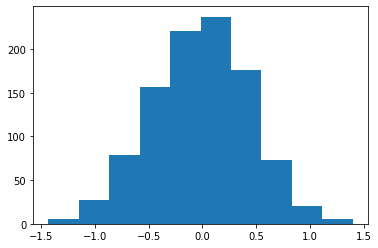

In [65]:
import numpy as np

mean_difference = regular.mean() - non_regular.mean()
# a series of all values from the total_sales column

mean_differences = []
# for loop to create our 1000 permutations
for i in range(1000):
    # # empty array to represent a random total sales w/ profile pic
    # group_a = []
    # # empty array to represent a random total sales w/o profile pic
    # group_b = []
    #
    # # use a for loop to randomonly place the total sales in one of the two lists
    # for data_entry in all_data:
    #     random_value = np.random.random()
    #     # randomally assinging each value to a new list
    #     if random_value > 0.5:
    #         group_a.append(data_entry)
    #     elif random_value <= 0.5:
    #          group_b.append(data_entry)
    #
    # print((np.array(group_a)).mean())
    # print(len(group_b))
    # mean_group_a = np.mean(np.array(group_a))
    # mean_group_b = np.mean(np.array(group_b))
    # print(mean_group_a,mean_group_b)
    #
    # # find the itteration mean and append to our mean difference list
    # iteration_mean_difference =  mean_group_a - mean_group_b

    group_a = all_data.sample(frac=regular.shape[0]/all_data.shape[0])
    group_b = all_data.drop(group_a.index)
    iteration_mean_difference =  group_a.mean() - group_b.mean()
    mean_differences.append(iteration_mean_difference)

# use matplotlib to visulize the mean_differences list as a histogram
plt.hist(mean_differences)
plt.show()

In [68]:
mean_differences_series = pd.Series(mean_differences)
mean_differences_series

0      0.758763
1     -0.526467
2     -0.202403
3     -0.694129
4     -0.495600
         ...   
995    0.052715
996   -0.126193
997    0.495920
998    0.089360
999   -0.110339
Length: 1000, dtype: float64

In [69]:
mean_difference

8.80847138739518

In [71]:
total = 0

#for loop to check if random mean diff is greater than our mean difference
for mean_diff in mean_differences:
    if mean_diff >= mean_difference:
        total += 1

#p value calculated by calulating percentage of values greater then the mean difference
p_value = total / 1000
p_value

0.0

[101.27,
 120.78,
 123.44,
 132.51,
 125.62,
 96.23,
 89.63,
 85.4,
 81.98,
 83.77,
 68.31,
 63.41,
 73.95,
 73.36,
 83.79,
 100.93,
 119.75,
 123.99,
 123.75,
 128.03,
 124.24,
 136.66,
 131.71,
 145.16,
 122.03,
 136.45,
 151.86,
 129.01,
 113.65,
 174.24,
 142.22,
 101.84,
 72.89,
 62.6,
 61.23,
 64.71,
 62.58,
 73.23,
 82.25,
 102.03,
 112.81,
 97.35,
 113.02,
 121.68,
 133.81,
 79.83,
 79.53,
 79.46,
 79.49,
 79.86,
 80.78,
 82.57,
 83.24,
 82.9,
 82.19,
 81.52,
 81.61,
 81.81,
 81.6,
 81.39,
 81.03,
 nan,
 nan,
 82.77,
 82.86,
 83.02,
 82.3,
 80.9,
 79.96,
 79.69,
 79.32,
 79.5,
 79.54,
 79.93,
 80.72,
 81.81,
 82.54,
 83.16,
 82.43,
 nan,
 80.65,
 80.06,
 80.71,
 85.25,
 84.44,
 83.71,
 85.05,
 83.77,
 82.28,
 81.16,
 80.68,
 80.21,
 79.66,
 80.95,
 80.47,
 80.16,
 80.02,
 80.57,
 81.51,
 83.79,
 82.85,
 81.99,
 80.69,
 79.54,
 79.18,
 80.07,
 80.39,
 66.51,
 62.99,
 68.97,
 78.09,
 91.5,
 92.77,
 85.24,
 77.81,
 66.77,
 66.31,
 65.77,
 62.99,
 59.06,
 72.62,
 73.33,
 107.82,
 1

In [111]:
non_regular.isna().sum()

3

(19.594712397531445, 2.982631038810785e-84)